In [67]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import seaborn as sns
%matplotlib inline

In [68]:
car_data = pd.read_csv("cardata.csv")
car_data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [69]:
population_mean = car_data['Selling_Price'].mean()
population_mean

4.661295681063123

In [70]:
sample = car_data.sample(n=80, random_state=22)
sample_mean = sample.Selling_Price.mean()
sample_mean

4.360625000000001

In [71]:
five_sample_means = []
for i in range(5):
    sample = car_data.sample(n=80, random_state=i+10)
    five_sample_means.append(sample.Selling_Price.mean())
    
five_sample_means

[4.4565, 5.282375, 4.97325, 5.14625, 4.61275]

In [72]:
five_sample_errors = [np.abs(sample_mean-population_mean)/population_mean for sample_mean in five_sample_means]
five_sample_errors

[0.04393535511920462,
 0.1332417768433056,
 0.06692437903139586,
 0.10403852321727663,
 0.010414632407968385]

In [73]:
sample_means = []
for i in range(4**4):
    sample = car_data.sample(n=80, random_state=i)
    sample_means.append(sample.Selling_Price.mean())
    
len(sample_means)

256

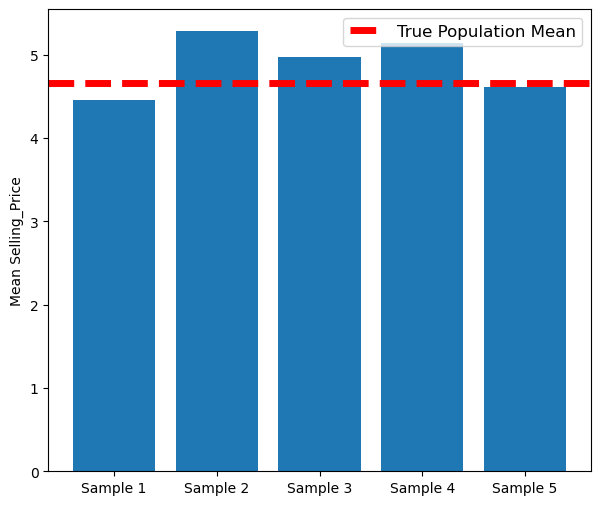

In [74]:
x_labels = [f"Sample {x}" for x in range(1, 6)]

fig, ax = plt.subplots(figsize=(7,6))

ax.bar(x_labels, five_sample_means)
ax.set_ylabel("Mean Selling_Price")
ax.axhline(y=population_mean, color="red", linewidth=5, linestyle="--")
ax.legend(
    
    labels=["True Population Mean"],
    fontsize="large"
);

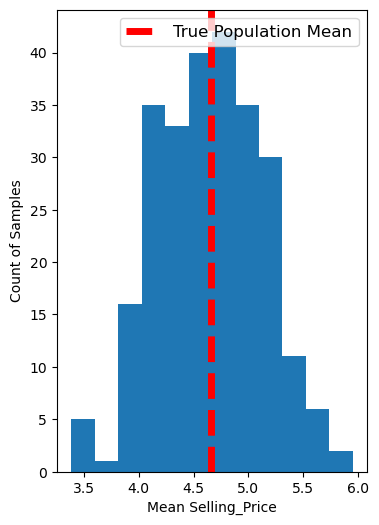

In [75]:
fig, ax = plt.subplots(figsize=(4,6))

ax.hist(sample_means, bins="auto")
ax.set_xlabel("Mean Selling_Price")
ax.set_ylabel("Count of Samples")
ax.axvline(x=population_mean, color="red", linewidth=5, linestyle="--")
ax.legend(
    
        
        
    
    labels=["True Population Mean"],
    fontsize="large"
);    

In [76]:
A_samples_mean = np.mean(sample_mean)
A_samples_mean

4.360625000000001

In [77]:
population_mean

4.661295681063123

In [78]:
err = np.abs(A_samples_mean - population_mean) / population_mean
accuracy = 1 - err
accuracy

0.9354963294251809

In [82]:
car_data.groupby(['Transmission','Kms_Driven'])['Selling_Price'].mean()


Transmission  Kms_Driven
Automatic     500           0.45
              1300          0.40
              1900          0.25
              4000          0.45
              4300          0.48
                            ... 
Manual        90000         2.75
              92233         0.10
              127000        0.35
              197176        3.49
              213000        0.31
Name: Selling_Price, Length: 221, dtype: float64

In [83]:
f = 'Selling_Price~Transmission'

In [84]:
model = ols(formula=f,data=car_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     46.58
Date:                Thu, 07 Mar 2024   Prob (F-statistic):           4.90e-11
Time:                        18:10:19   Log-Likelihood:                -894.20
No. Observations:                 301   AIC:                             1792.
Df Residuals:                     299   BIC:                             1800.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  9.4200      0.749     12.580      0.000       7.946      10.894
Transmission[T.Manual]    -5.4880      0.804     -6.825      0.000      -7.070      -3.906
==============================================================================
Omnibus:                      143.925   Durbin-Watson:                   1.182
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              946.055
Skew:                           1.855   Prob(JB):                    3.69e-206
Kurtosis:                      10.853   Cond. No.                         5.31
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

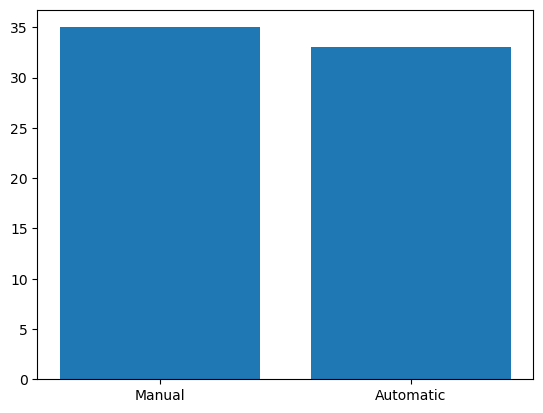

In [85]:
plt.bar(car_data.Transmission, car_data.Selling_Price)
plt.show()

In [86]:
car_data.groupby(['Year','Kms_Driven'])['Selling_Price'].mean()

Year  Kms_Driven
2003  62000         2.25
      127000        0.35
2004  135154        1.50
2005  55000         0.20
      75000         3.51
                    ... 
2017  20114         5.25
      21200         6.50
      37000         7.75
      38488         3.50
2018  2071          9.25
Name: Selling_Price, Length: 270, dtype: float64

In [87]:
f = 'Selling_Price~Year'

In [88]:
model = ols(formula=f,data=car_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     17.66
Date:                Thu, 07 Mar 2024   Prob (F-statistic):           3.50e-05
Time:                        18:10:20   Log-Likelihood:                -907.35
No. Observations:                 301   AIC:                             1819.
Df Residuals:                     299   BIC:                             1826.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -831.1789    198.910     -4.179      0.000   -1222.620    -439.737
Year           0.4151      0.099      4.202      0.000       0.221       0.609
==============================================================================
Omnibus:                      186.769   Durbin-Watson:                   0.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1516.999
Skew:                           2.500   Prob(JB):                         0.00
Kurtosis:                      12.796   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

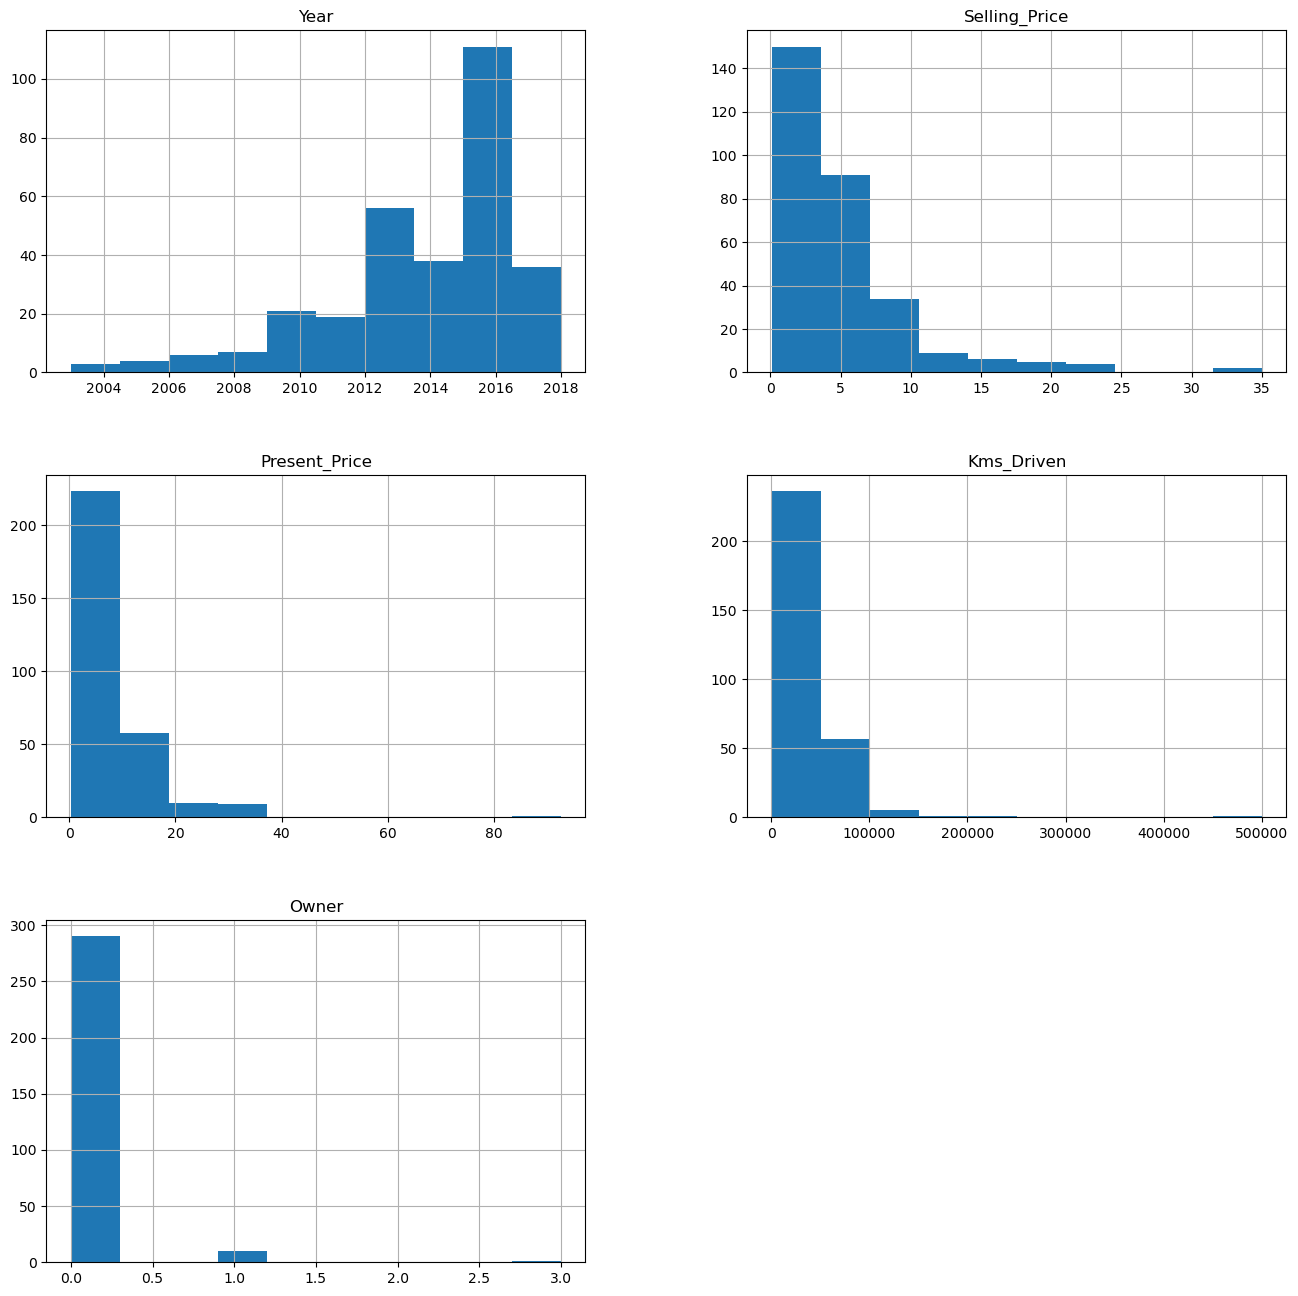

In [89]:
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (16,16))
ax = fig.gca()
car_data.hist(ax = ax);

In [90]:
car_data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


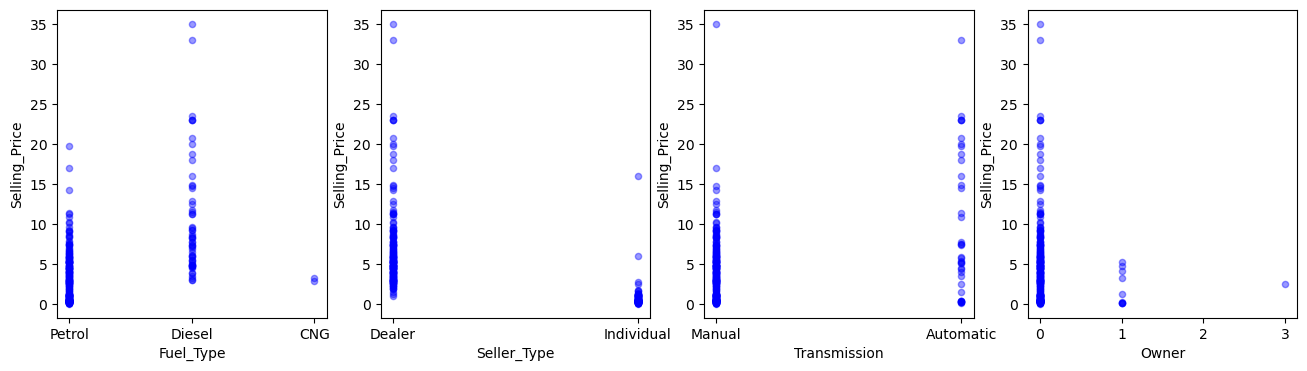

In [91]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,4))

for xcol, ax in zip(['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'], axes):
    car_data.plot(kind='scatter', x=xcol, y='Selling_Price', ax=ax, alpha=0.4, color='b')

In [92]:
car_data["Fuel_Type"] = car_data["Fuel_Type"].map({"Petrol": 2, "Diesel": 3, "CNG": 4})
car_data["Seller_Type"] = car_data["Seller_Type"].map({"Dealer": 2, "Individual": 3})
car_data["Transmission"] = car_data["Transmission"].map({"Manual": 2, "Automatic": 3})
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,2,2,0
1,sx4,2013,4.75,9.54,43000,3,2,2,0
2,ciaz,2017,7.25,9.85,6900,2,2,2,0
3,wagon r,2011,2.85,4.15,5200,2,2,2,0
4,swift,2014,4.60,6.87,42450,3,2,2,0


In [93]:
dt_dummies = pd.get_dummies(car_data['Fuel_Type'], prefix='ft', drop_first=True)
tr_dummies = pd.get_dummies(car_data['Transmission'], prefix='tr', drop_first=True)
st_dummies = pd.get_dummies(car_data['Seller_Type'], prefix='st', drop_first=True)

In [94]:
car_data1 = car_data.drop(['Fuel_Type','Transmission', 'Seller_Type'], axis=1)

In [95]:
car_data1 = pd.concat([car_data1, dt_dummies, tr_dummies, st_dummies],axis = 1)
car_data1

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Owner,ft_3,ft_4,tr_3,st_3
0,ritz,2014,3.35,5.59,27000,0,False,False,False,False
1,sx4,2013,4.75,9.54,43000,0,True,False,False,False
2,ciaz,2017,7.25,9.85,6900,0,False,False,False,False
3,wagon r,2011,2.85,4.15,5200,0,False,False,False,False
4,swift,2014,4.60,6.87,42450,0,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,0,True,False,False,False
297,brio,2015,4.00,5.90,60000,0,False,False,False,False
298,city,2009,3.35,11.00,87934,0,False,False,False,False
299,city,2017,11.50,12.50,9000,0,True,False,False,False


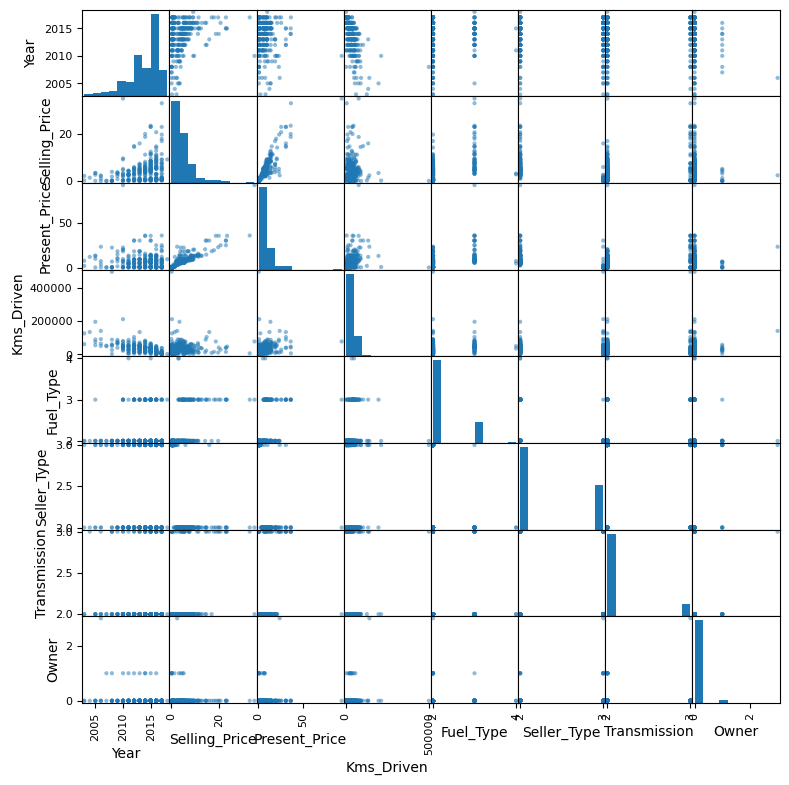

In [96]:
pd.plotting.scatter_matrix(car_data,figsize  = [9, 9]);
plt.show()


In [97]:
car_data = car_data.drop(columns=['Car_Name'])

In [98]:
car_data.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,0.053643,-0.039896,-0.000394,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,0.509467,-0.550724,0.367128,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.440415,-0.512030,0.348715,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.166801,-0.101419,0.162510,0.089216
Fuel_Type,0.053643,0.509467,0.440415,0.166801,1.000000,-0.352415,0.080466,-0.055705
Seller_Type,-0.039896,-0.550724,-0.512030,-0.101419,-0.352415,1.000000,-0.063240,0.124269
Transmission,-0.000394,0.367128,0.348715,0.162510,0.080466,-0.063240,1.000000,0.050316
Owner,-0.182104,-0.088344,0.008057,0.089216,-0.055705,0.124269,0.050316,1.000000


In [99]:
df = car_data.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df['pairs'] = list(zip(df.level_0, df.level_1))
df.set_index(['pairs'], inplace = True)

df.drop(columns=['level_1', 'level_0'], inplace = True)
df.columns = ['cc']

df.drop_duplicates(inplace=True)
df[(df.cc>.75) & (df.cc<1)]

,cc
pairs,
"(Present_Price, Selling_Price)",0.878983


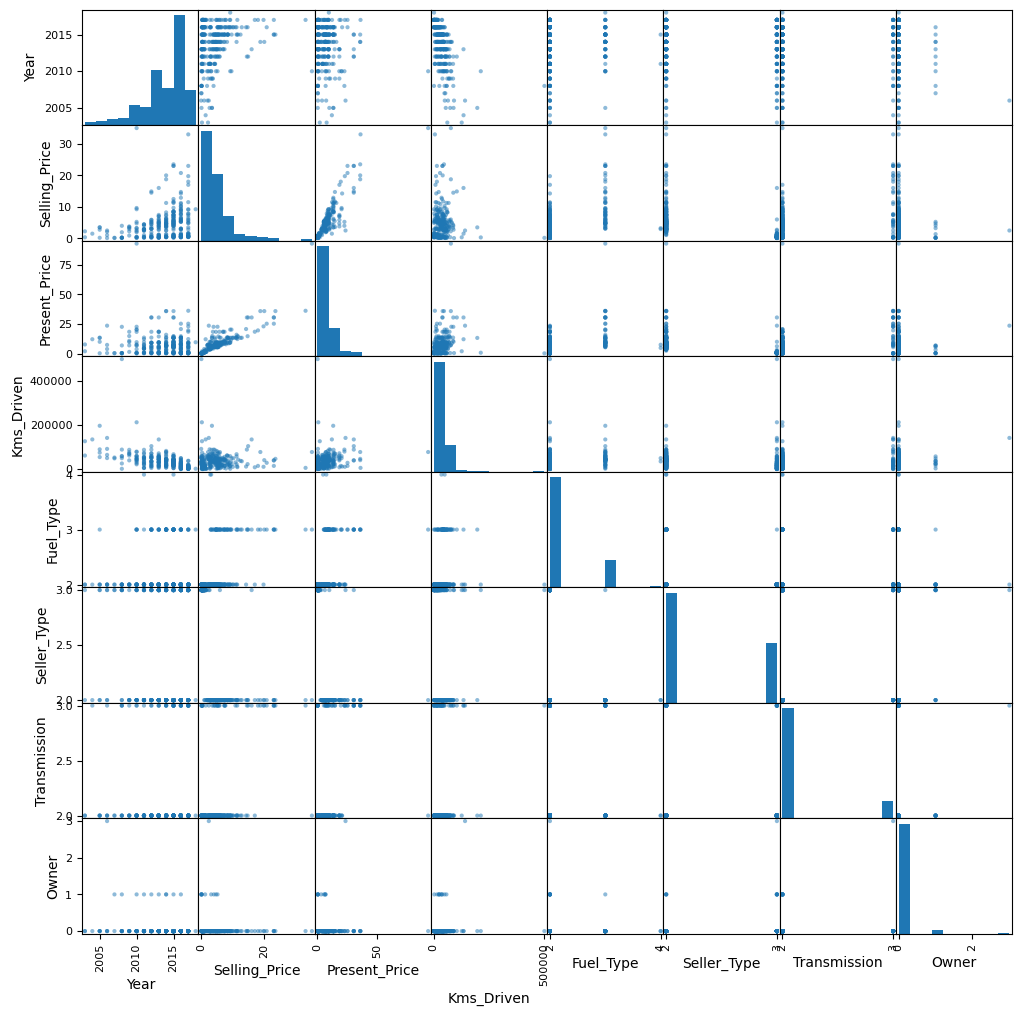

In [100]:
pd.plotting.scatter_matrix(car_data,figsize  = [12, 12]);
plt.show()

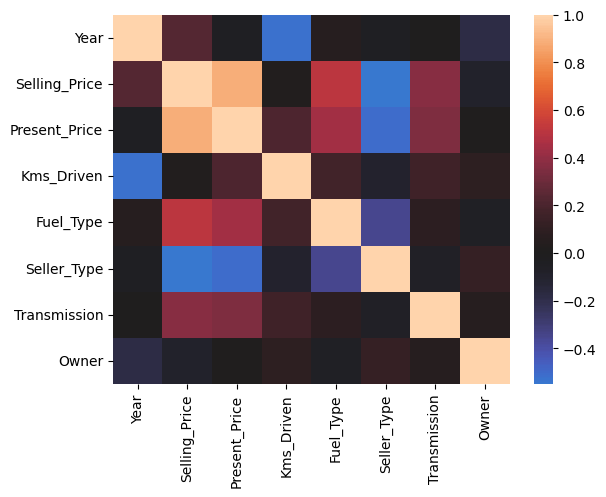

In [101]:
import seaborn as sns
sns.heatmap(car_data.corr(), center=0);

In [102]:
from statsmodels.formula.api import ols

In [103]:
outcome = 'Selling_Price'
x_cols = ['Present_Price', 'Kms_Driven', 'Fuel_Type','Transmission','Year']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula,data =car_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     392.0
Date:                Thu, 07 Mar 2024   Prob (F-statistic):          5.71e-128
Time:                        18:10:35   Log-Likelihood:                -609.88
No. Observations:                 301   AIC:                             1232.
Df Residuals:                     295   BIC:                             1254.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -868.1624     89.141     -9.739      0.000   -1043.595    -692.730
Present_Price     0.4759      0.015     32.140      0.000       0.447       0.505
Kms_Driven    -5.806e-06   3.38e-06     -1.717      0.087   -1.25e-05    8.51e-07
Fuel_Type         1.6808      0.286      5.873      0.000       1.118       2.244
Transmission      1.2087      0.341      3.546      0.000       0.538       1.879
Year              0.4286      0.044      9.672      0.000       0.341       0.516
==============================================================================
Omnibus:                       57.046   Durbin-Watson:                   1.632
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              576.782
Skew:                           0.354   Prob(JB):                    5.67e-126
Kurtosis:                       9.745   Cond. No.                     4.47e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.47e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [104]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(car_data)

In [105]:
train

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
229,2012,3.10,6.79,52132,3,2,2,0
64,2017,33.00,36.23,6000,3,2,3,0
163,2010,0.45,0.95,27000,2,3,2,0
108,2016,1.20,1.50,18000,2,3,2,0
287,2015,5.75,7.50,44000,2,2,3,0
...,...,...,...,...,...,...,...,...
283,2016,8.99,11.80,9010,2,2,2,0
244,2013,5.95,9.40,49000,3,2,2,0
156,2017,0.48,0.52,15000,2,3,2,0
4,2014,4.60,6.87,42450,3,2,2,0


In [106]:
train

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
229,2012,3.10,6.79,52132,3,2,2,0
64,2017,33.00,36.23,6000,3,2,3,0
163,2010,0.45,0.95,27000,2,3,2,0
108,2016,1.20,1.50,18000,2,3,2,0
287,2015,5.75,7.50,44000,2,2,3,0
...,...,...,...,...,...,...,...,...
283,2016,8.99,11.80,9010,2,2,2,0
244,2013,5.95,9.40,49000,3,2,2,0
156,2017,0.48,0.52,15000,2,3,2,0
4,2014,4.60,6.87,42450,3,2,2,0


In [107]:
y = car_data[['Selling_Price']]
X = car_data.drop(['Selling_Price'], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y)

In [108]:
X_train

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
177,2016,0.57,24000,2,3,3,0
5,2018,9.83,2071,3,2,2,0
99,2010,20.45,50024,3,2,2,0
222,2014,7.60,77632,3,2,2,0
185,2008,0.58,1900,2,3,3,0
...,...,...,...,...,...,...,...
82,2017,25.39,15000,3,2,3,0
128,2017,0.87,3000,2,3,2,0
289,2016,13.60,10980,2,2,2,0
184,2008,0.75,26000,2,3,2,1


In [109]:
y_train

,Selling_Price
177,0.35
5,9.25
99,9.65
222,6.00
185,0.25
...,...
82,23.00
128,0.80
289,10.11
184,0.25


In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [111]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

225 76 225 76


In [112]:
from sklearn.preprocessing import FunctionTransformer
import numpy as np

log_transformer = FunctionTransformer(np.log, validate=True)

log_columns = ['Kms_Driven', 'Present_Price','Year']


new_log_columns = ['log_Kms_Driven', 'log_Present_Price','log_Year']

In [113]:
X_test_log = pd.DataFrame(log_transformer.transform(X_test[log_columns]), 
                          columns=new_log_columns, index=X_test.index)

X_test = pd.concat([X_test.drop(log_columns, axis=1), X_test_log], axis=1)
X_test

,Fuel_Type,Seller_Type,Transmission,Owner,log_Kms_Driven,log_Present_Price,log_Year
177,2,3,3,0,10.085809,-0.562119,7.608871
289,2,2,2,0,9.303831,2.610070,7.608871
228,3,2,2,0,11.002100,2.240710,7.606885
198,2,3,2,1,10.463103,-0.562119,7.606387
60,2,2,2,0,10.596660,2.923699,7.607381
...,...,...,...,...,...,...,...
22,2,2,3,0,10.819778,2.080691,7.606387
286,2,2,2,0,10.260077,2.066863,7.608871
56,2,2,2,0,10.609896,1.983756,7.608374
239,2,2,2,0,10.073610,1.488400,7.606885


In [114]:
X_train_log = pd.DataFrame(log_transformer.fit_transform(X_train[log_columns]), 
                           columns=new_log_columns, index=X_train.index)
X_train = pd.concat([X_train.drop(log_columns, axis=1), X_train_log], axis=1)
X_train

,Fuel_Type,Seller_Type,Transmission,Owner,log_Kms_Driven,log_Present_Price,log_Year
129,2,3,2,0,8.517193,-0.174353,7.609367
232,2,2,3,0,9.464983,2.693951,7.608374
195,2,3,2,0,10.463103,-1.139434,7.608374
277,2,2,2,0,9.988747,2.610070,7.608374
280,2,2,2,0,9.579487,1.774952,7.608374
...,...,...,...,...,...,...,...
188,2,3,2,0,9.798127,-0.562119,7.607381
71,3,2,2,0,10.714418,2.524127,7.606387
106,2,3,2,1,9.711116,1.238374,7.607878
270,2,2,2,0,11.146792,2.302585,7.606387


In [115]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [116]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [117]:
mse_train = np.sum((y_train - y_hat_train)**2)/len(y_train)
mse_test = np.sum((y_test - y_hat_test)**2)/len(y_test)
print('Train Mean Squared Error:', mse_train)
print('Test Mean Squared Error:', mse_test)

Train Mean Squared Error: Selling_Price    6.627315
dtype: float64
Test Mean Squared Error: Selling_Price    6.264986
dtype: float64


In [118]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)

Train Mean Squared Error: 6.627314582522344
Test Mean Squared Error: 6.2649857862291585


In [119]:
from sklearn.tree import DecisionTreeRegressor

other_model = DecisionTreeRegressor(random_state=42)
other_model.fit(X_train, y_train)

other_train_mse = mean_squared_error(y_train, other_model.predict(X_train))
other_test_mse = mean_squared_error(y_test, other_model.predict(X_test))
print('Train Mean Squared Error:', other_train_mse)
print('Test Mean Squared Error:', other_test_mse)

Train Mean Squared Error: 4.1086505480261034e-35
Test Mean Squared Error: 1.709077631578947


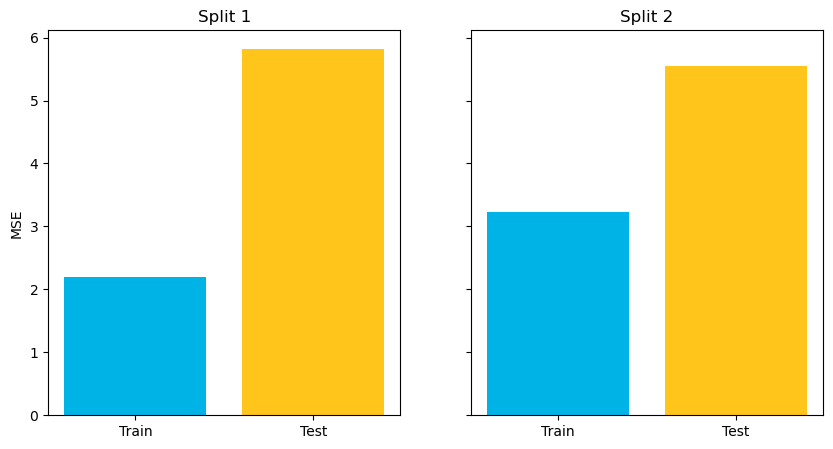

In [120]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


y = car_data[['Selling_Price']]
X = car_data.drop(['Selling_Price'], axis=1)

linreg = LinearRegression()

# Split using random_state 87
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, random_state=87, test_size=0.33)
linreg.fit(X_train_1, y_train_1)
train_mse_1 = mean_squared_error(y_train_1, linreg.predict(X_train_1))
test_mse_1 = mean_squared_error(y_test_1, linreg.predict(X_test_1))

# Split using random_state 41
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, random_state=41, test_size=0.33)
linreg.fit(X_train_2, y_train_2)
train_mse_2 = mean_squared_error(y_train_2, linreg.predict(X_train_2))
test_mse_2 = mean_squared_error(y_test_2, linreg.predict(X_test_2))

# Plot metrics
fig, (left, right) = plt.subplots(ncols=2, figsize=(10,5), sharey=True)
labels = ["Train", "Test"]
colors = ["#00B3E6", "#FFC51B"]
left.bar(labels, [train_mse_1, test_mse_1], color=colors)
left.set_title("Split 1")
left.set_ylabel("MSE")
right.bar(labels, [train_mse_2, test_mse_2], color=colors)
right.set_title("Split 2");

In [121]:
 from sklearn.model_selection import cross_val_score

cross_val_score(linreg, X, y)

array([  0.83482494,   0.77512003, -94.61105213,   0.61088628,
         0.83892197])

In [122]:
from sklearn.model_selection import cross_validate

cross_validate(linreg, X, y)["test_score"]

array([  0.83482494,   0.77512003, -94.61105213,   0.61088628,
         0.83892197])

In [123]:
cross_validate(linreg, X, y)

{'fit_time': array([0.00853252, 0.00700951, 0.01461577, 0.00652575, 0.00752401]),
 'score_time': array([0.00500274, 0.00658274, 0.00552797, 0.00351834, 0.00701308]),
 'test_score': array([  0.83482494,   0.77512003, -94.61105213,   0.61088628,
          0.83892197])}

In [124]:
cross_validate(linreg, X, y, scoring=["r2", "neg_mean_squared_error"])

{'fit_time': array([0.00953937, 0.00855637, 0.00654006, 0.00453258, 0.00854802]),
 'score_time': array([0.01257396, 0.00752473, 0.0049963 , 0.01306081, 0.00751901]),
 'test_r2': array([  0.83482494,   0.77512003, -94.61105213,   0.61088628,
          0.83892197]),
 'test_neg_mean_squared_error': array([ -3.17740723, -14.78515391,  -3.21132028,  -4.13245537,
         -0.94020448])}

In [125]:
cross_validate(linreg, X, y, return_train_score=True)

{'fit_time': array([0.03337407, 0.00500965, 0.00552416, 0.00850511, 0.00956726]),
 'score_time': array([0.00752926, 0.00553203, 0.01258278, 0.00549889, 0.00554466]),
 'test_score': array([  0.83482494,   0.77512003, -94.61105213,   0.61088628,
          0.83892197]),
 'train_score': array([0.88046378, 0.90763607, 0.87361365, 0.89060554, 0.87683436])}

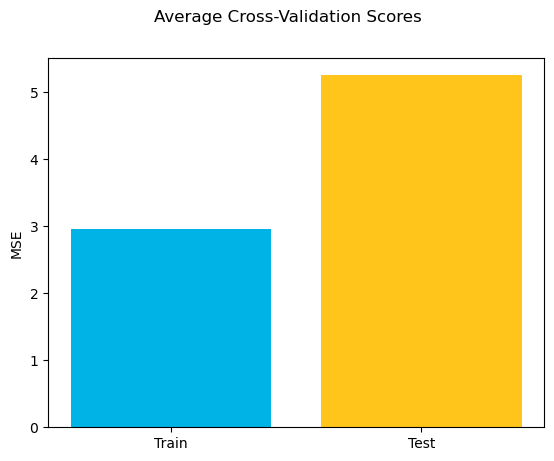

In [126]:
cross_val_results = cross_validate(linreg, X, y, scoring="neg_mean_squared_error", return_train_score=True)
# Negative signs in front to convert back to MSE from -MSE
train_avg = -cross_val_results["train_score"].mean()
test_avg = -cross_val_results["test_score"].mean()

fig, ax = plt.subplots()
ax.bar(labels, [train_avg, test_avg], color=colors)
ax.set_ylabel("MSE")
fig.suptitle("Average Cross-Validation Scores");

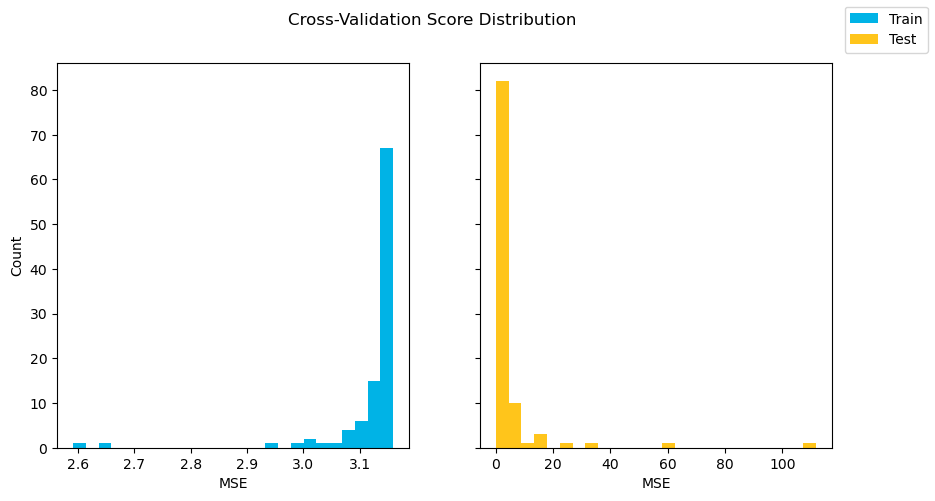

In [127]:
cross_val_results = cross_validate(linreg, X, y, cv=100, scoring="neg_mean_squared_error", return_train_score=True)
train_scores = -cross_val_results["train_score"]
test_scores = -cross_val_results["test_score"]

fig, (left, right) = plt.subplots(ncols=2, figsize=(10,5), sharey=True)
bins=25
left.hist(train_scores, label=labels[0], bins=bins, color=colors[0])
left.set_ylabel("Count")
left.set_xlabel("MSE")
right.hist(test_scores, label=labels[1], bins=bins, color=colors[1])
right.set_xlabel("MSE")
fig.suptitle("Cross-Validation Score Distribution")
fig.legend();

In [128]:
car_data

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,2,2,2,0
1,2013,4.75,9.54,43000,3,2,2,0
2,2017,7.25,9.85,6900,2,2,2,0
3,2011,2.85,4.15,5200,2,2,2,0
4,2014,4.60,6.87,42450,3,2,2,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,3,2,2,0
297,2015,4.00,5.90,60000,2,2,2,0
298,2009,3.35,11.00,87934,2,2,2,0
299,2017,11.50,12.50,9000,3,2,2,0


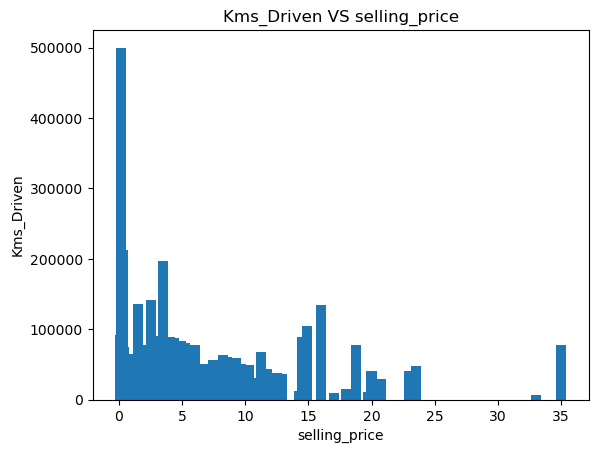

In [129]:
plt.bar(car_data.Selling_Price, car_data.Kms_Driven)
plt.xlabel("selling_price")
plt.ylabel("Kms_Driven")
plt.title("Kms_Driven VS selling_price")
plt.show()

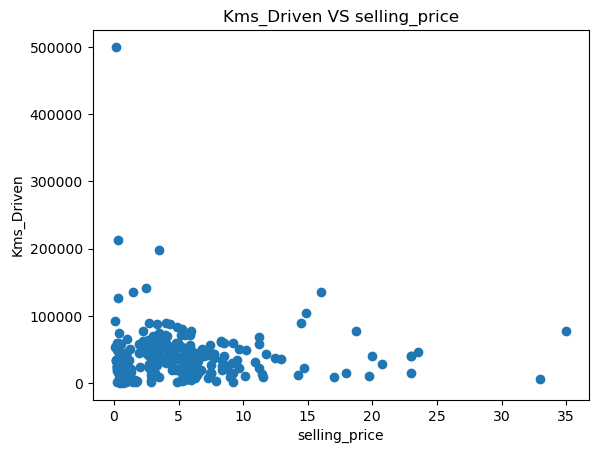

In [130]:
plt.scatter(car_data.Selling_Price, car_data.Kms_Driven)
plt.xlabel("selling_price")
plt.ylabel("Kms_Driven")
plt.title("Kms_Driven VS selling_price")
plt.show()

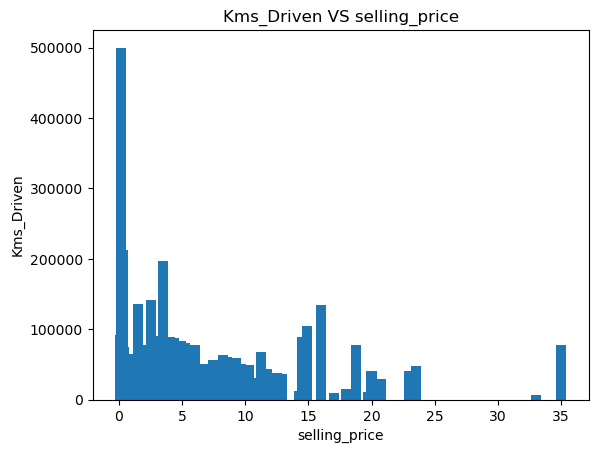

In [131]:
plt.bar(car_data.Selling_Price, car_data.Kms_Driven)
plt.xlabel("selling_price")
plt.ylabel("Kms_Driven")
plt.title("Kms_Driven VS selling_price")
plt.show()

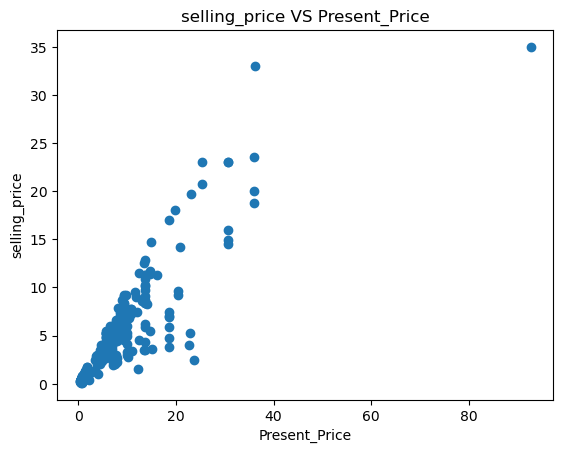

In [132]:
plt.scatter(car_data.Present_Price, car_data.Selling_Price)
plt.xlabel("Present_Price")
plt.ylabel("selling_price")
plt.title("selling_price VS Present_Price")
plt.show()

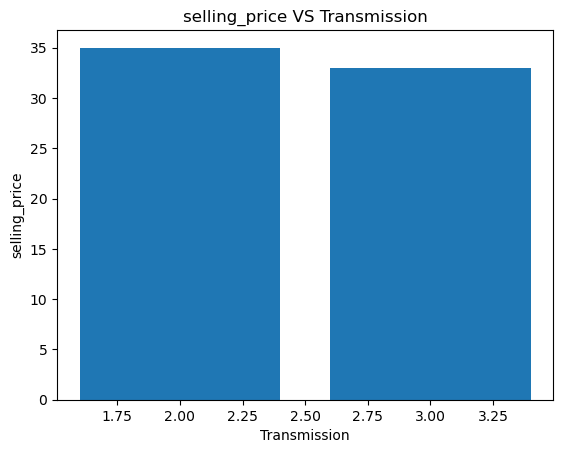

In [133]:
plt.bar(car_data.Transmission, car_data.Selling_Price)
plt.xlabel("Transmission")
plt.ylabel("selling_price")
plt.title("selling_price VS Transmission")
plt.show()

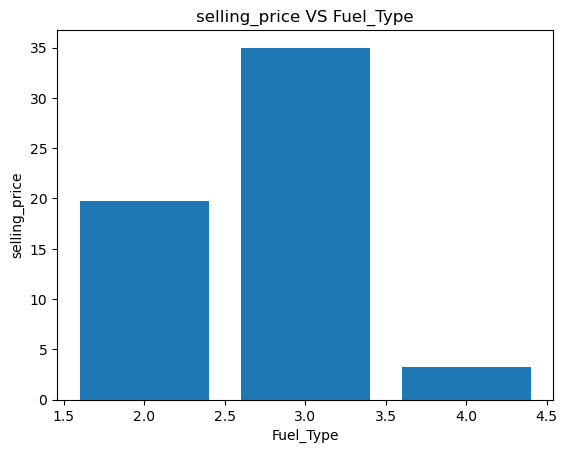

In [134]:
plt.bar(car_data.Fuel_Type, car_data.Selling_Price)
plt.xlabel("Fuel_Type")
plt.ylabel("selling_price")
plt.title("selling_price VS Fuel_Type")
plt.show()

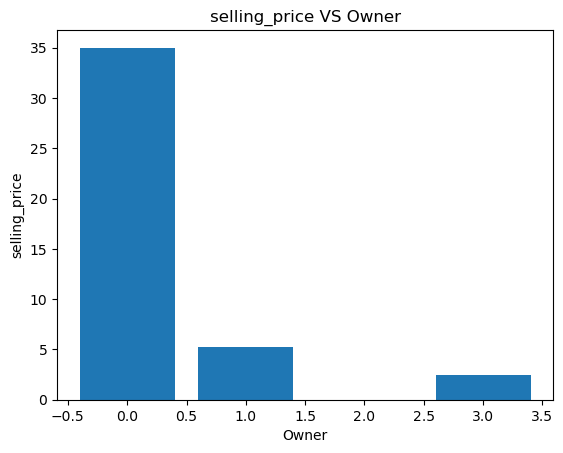

In [135]:
plt.bar(car_data.Owner, car_data.Selling_Price)
plt.xlabel("Owner")
plt.ylabel("selling_price")
plt.title("selling_price VS Owner")
plt.show()

In [136]:
from statsmodels.formula.api import ols

In [137]:
outcome = 'Selling_Price'
x_cols = ['Present_Price', 'Kms_Driven', 'Fuel_Type','Transmission','Year']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula,data =car_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     392.0
Date:                Thu, 07 Mar 2024   Prob (F-statistic):          5.71e-128
Time:                        18:10:46   Log-Likelihood:                -609.88
No. Observations:                 301   AIC:                             1232.
Df Residuals:                     295   BIC:                             1254.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -868.1624     89.141     -9.739      0.000   -1043.595    -692.730
Present_Price     0.4759      0.015     32.140      0.000       0.447       0.505
Kms_Driven    -5.806e-06   3.38e-06     -1.717      0.087   -1.25e-05    8.51e-07
Fuel_Type         1.6808      0.286      5.873      0.000       1.118       2.244
Transmission      1.2087      0.341      3.546      0.000       0.538       1.879
Year              0.4286      0.044      9.672      0.000       0.341       0.516
==============================================================================
Omnibus:                       57.046   Durbin-Watson:                   1.632
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              576.782
Skew:                           0.354   Prob(JB):                    5.67e-126
Kurtosis:                       9.745   Cond. No.                     4.47e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.47e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""